# Import labraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("iris (1).csv")

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

# Step 4: Visualize Distributions


# Histrogram plot

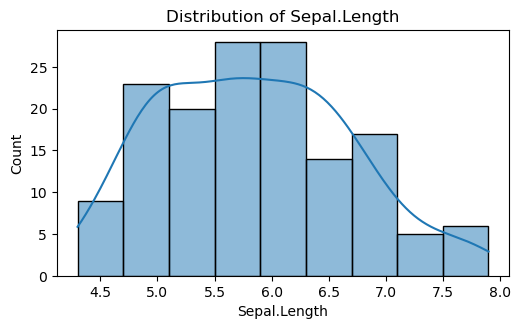

In [7]:
plt.figure(figsize=(10,6))
for i, feature in enumerate(df.columns[:1]):
    plt.subplot(2,2, i+1)
    sns.histplot(df[feature],kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# BoxPlot

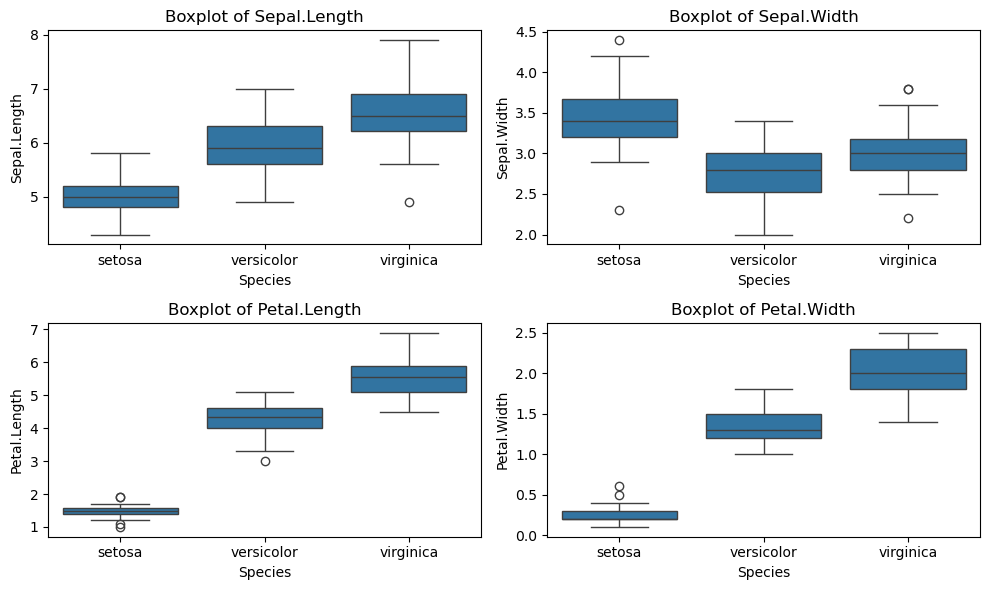

In [8]:
plt.figure(figsize=(10, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df['Species'], y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# HeatMap

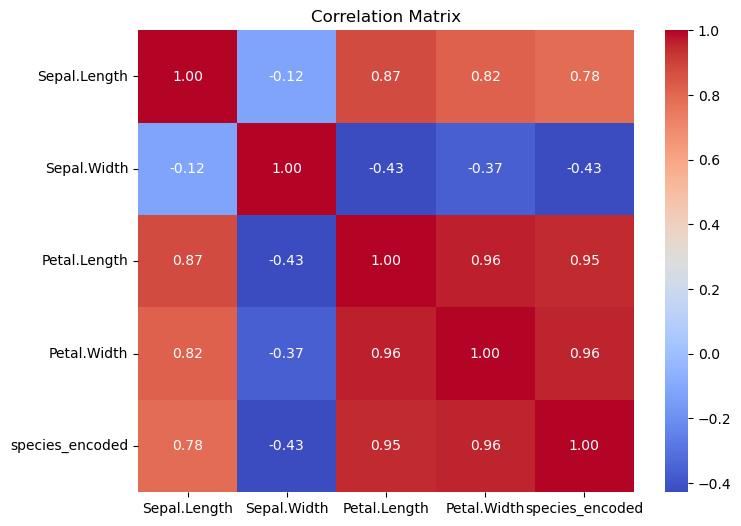

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['Species'])

# Compute correlation matrix
correlation_matrix = df.drop(columns=['Species']).corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


# Pie Chart

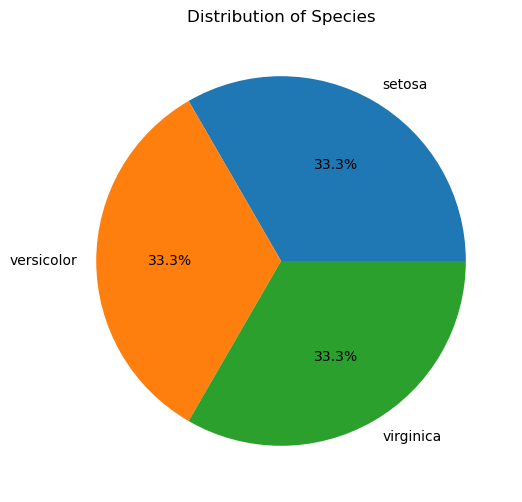

In [11]:
plt.figure(figsize=(8, 6))
df['Species'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Species')
plt.ylabel('')
plt.show()

# Pair Plots

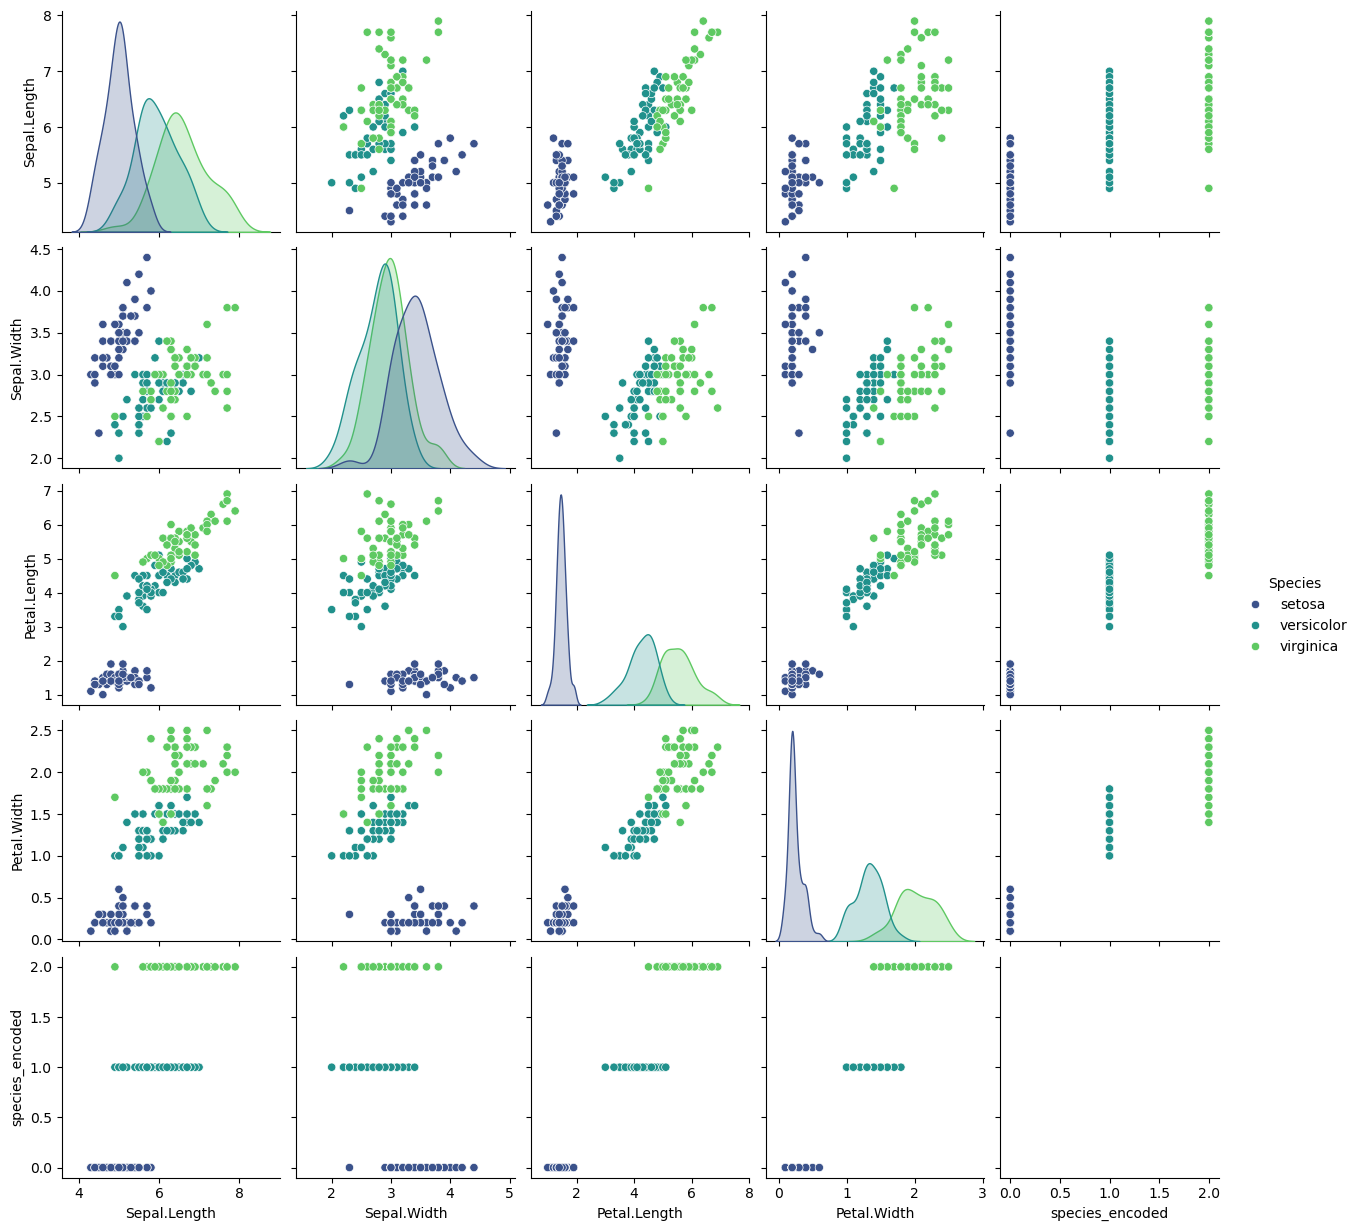

In [12]:

# Create a pair plot
sns.pairplot(data=df, hue='Species', palette='viridis')
plt.show()

# Visualize petal-to-sepal ratio by species using box plots


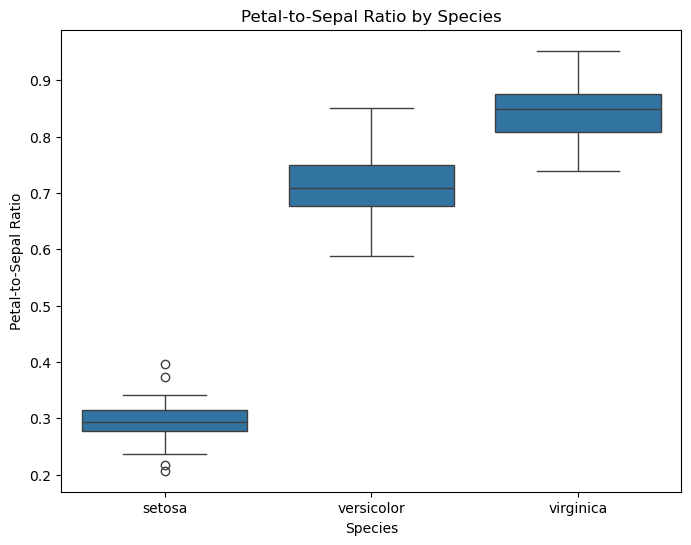

In [13]:
df['petal_sepal_ratio'] = df['Petal.Length'] / df['Sepal.Length']

plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='petal_sepal_ratio', data=df)
plt.title('Petal-to-Sepal Ratio by Species')
plt.xlabel('Species')
plt.ylabel('Petal-to-Sepal Ratio')
plt.show()